In [124]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [125]:
# loading both train and test datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [127]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [128]:
train_df = train_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_df = test_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [137]:
(train_df.isnull().sum()/train_df.shape[0])*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

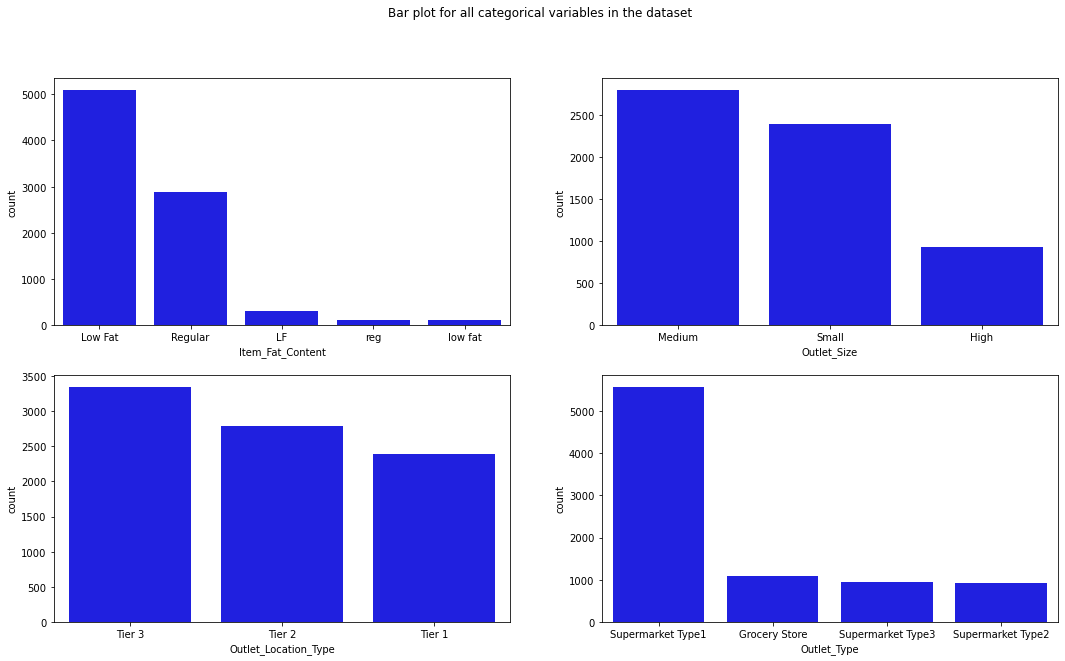

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
  
fig.suptitle('Bar plot for all categorical variables in the dataset')
  

sns.countplot(ax=axes[0, 0], x='Item_Fat_Content', data=train_df, color='blue', 
              order=train_df['Item_Fat_Content'].value_counts().index, );

sns.countplot(ax=axes[0, 1], x='Outlet_Size', data=train_df, color='blue', 
              order=train_df['Outlet_Size'].value_counts().index);

sns.countplot(ax=axes[1, 0], x='Outlet_Location_Type', data=train_df, color='blue', 
              order=train_df['Outlet_Location_Type'].value_counts().index);

sns.countplot(ax=axes[1, 1], x='Outlet_Type', data=train_df, color='blue', 
              order=train_df['Outlet_Type'].value_counts().index);

In [144]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x=='low fat' or x=='LF' else x)
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(lambda x: 'Regular' if x=='reg' else x)

In [145]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x=='low fat' or x=='LF' else x)
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply(lambda x: 'Regular' if x=='reg' else x)

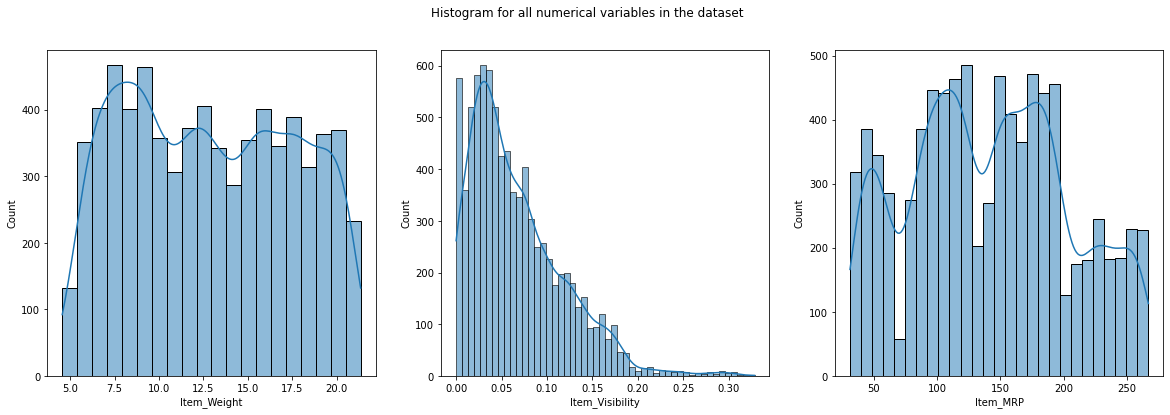

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  
fig.suptitle('Histogram for all numerical variables in the dataset')
  
sns.histplot(x='Item_Weight', data=train_df, kde=True, ax=axes[0]);
sns.histplot(x='Item_Visibility', data=train_df, kde=True, ax=axes[1]);
sns.histplot(x='Item_MRP', data=train_df, kde=True, ax=axes[2]);

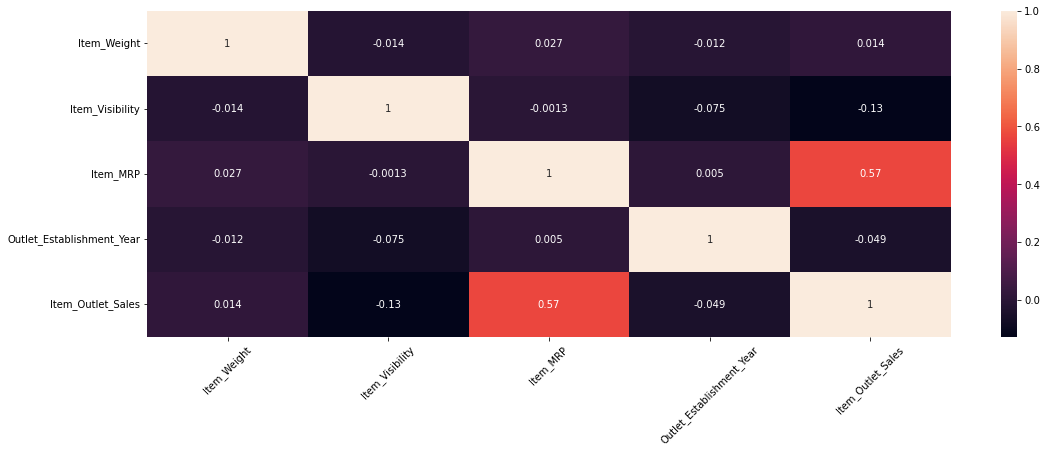

In [147]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(train_df.corr(), annot=True);
plt.xticks(rotation=45);

In [149]:
item_weight_indices_to_be_updated = train_df[train_df['Item_Weight'].isnull()].index

In [152]:
item_weight_indices_to_be_updated = train_df[train_df['Item_Weight'].isnull()].index
train_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, 
                                                                                   len(item_weight_indices_to_be_updated))

In [154]:
item_weight_indices_to_be_updated = test_df[test_df['Item_Weight'].isnull()].index
test_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, 
                                                                                   len(item_weight_indices_to_be_updated))

In [157]:
outlet_size_data = train_df[train_df['Outlet_Size'].notnull()]
outlet_size_missing_data = train_df[train_df['Outlet_Size'].isnull()]

In [160]:
grocery_store_indices = train_df[train_df['Outlet_Size'].isnull()].query("Outlet_Type == 'Grocery Store'").index
tier_2_indices = train_df[train_df['Outlet_Size'].isnull()].query("Outlet_Location_Type == 'Tier 2'").index

In [161]:
train_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'
train_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [162]:
grocery_store_indices = test_df[test_df['Outlet_Size'].isnull()].query("Outlet_Type == 'Grocery Store'").index
tier_2_indices = test_df[test_df['Outlet_Size'].isnull()].query("Outlet_Location_Type == 'Tier 2'").index

In [163]:
test_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'
test_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [164]:
train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']
test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']

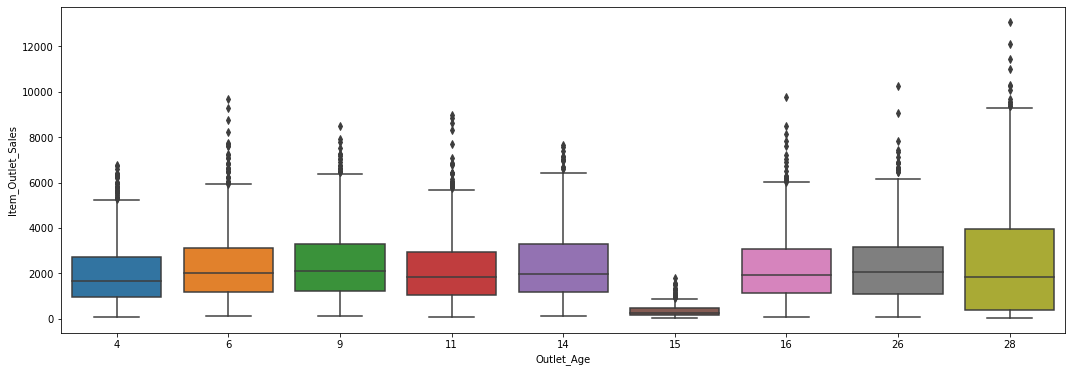

In [165]:
fig= plt.figure(figsize=(18, 6))
sns.boxplot(x='Outlet_Age', y='Item_Outlet_Sales', data=train_df);

In [166]:
# we are removing the outcome variable from the feature set and also the variable Outlet_Establishment_Year as we have created
# a new variable Outlet_Age
train_features = train_df.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis=1)

# and then we are extracting the outcome variable separately
train_target = train_df['Item_Outlet_Sales']

In [167]:
# in linear based models it is mandatory to create dummy variables for the categorical variables
train_features = pd.get_dummies(train_features, drop_first=True)
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [168]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800,15
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [169]:
# creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# the above scaler returns the data in array format, below we are converting back to pandas dataframe
train_features_scaled = pd.DataFrame(train_features_scaled, index=train_features.index, columns=train_features.columns)
train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [171]:
train_features_scaled=sm.add_constant(train_features_scaled)

In [183]:
ols_model_0=sm.OLS(train_target,train_features_scaled)

In [186]:
ols_res_0=ols_model_0.fit()

In [190]:
print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     405.8
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:05:28   Log-Likelihood:                -71993.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [191]:
# selecting only relevant features
train_features_2 = train_df[['Item_MRP', 'Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

In [192]:
train_features_2 = pd.get_dummies(train_features_2, drop_first=True)
train_features_2.head()

,Item_MRP,Outlet_Age,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,14,1,0,0,0,1,0,0
1,48.2692,4,1,0,0,1,0,1,0
2,141.6180,14,1,0,0,0,1,0,0
3,182.0950,15,0,1,0,1,0,0,0
4,53.8614,26,0,0,0,1,1,0,0


In [193]:
train_features_scaled_2 = scaler.fit_transform(train_features_2)
train_features_scaled_2 = pd.DataFrame(train_features_scaled_2, index=train_features_2.index, columns=train_features_2.columns)
train_features_scaled_2.head()

,Item_MRP,Outlet_Age,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.927507,0.416667,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.072068,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.468288,0.416667,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.640093,0.458333,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.095805,0.916667,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [194]:
train_features_scaled_2 = sm.add_constant(train_features_scaled_2)

ols_model_2 = sm.OLS(train_target, train_features_scaled_2)
ols_res_2 = ols_model_2.fit()

In [195]:
print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1217.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:25:37   Log-Likelihood:                -71998.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8513   BIC:                         1.441e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [196]:
# we drop the one with the highest vif value and check the Adjusted-R Squared
vif_series_1 = pd.Series([variance_inflation_factor(train_features_scaled_2.values,i) for i in range(train_features_scaled_2.shape[1])],
                        index=train_features_scaled_2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series_1))

Series before feature selection: 

const                            1703.138903
Item_MRP                            1.000182
Outlet_Age                         50.851534
Outlet_Size_Medium                110.890861
Outlet_Size_Small                 106.701575
Outlet_Location_Type_Tier 2        11.266788
Outlet_Location_Type_Tier 3        36.770793
Outlet_Type_Supermarket Type1      29.359000
Outlet_Type_Supermarket Type2       9.863086
Outlet_Type_Supermarket Type3      20.126350
dtype: float64



In [197]:
train_features_scaled_3 = train_features_scaled_2.drop(['Outlet_Size_Medium'], axis=1)
ols_model_3 = sm.OLS(train_target, train_features_scaled_3)
ols_res_3 = ols_model_3.fit()

In [198]:
print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1367.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:38:19   Log-Likelihood:                -72002.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8514   BIC:                         1.441e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [199]:
vif_series_2 = pd.Series([variance_inflation_factor(train_features_scaled_3.values,i) for i in range(train_features_scaled_3.shape[1])],
                        index=train_features_scaled_3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series_2))

Series before feature selection: 

const                            60.957867
Item_MRP                          1.000137
Outlet_Age                        5.032103
Outlet_Size_Small                 4.214391
Outlet_Location_Type_Tier 2       3.538163
Outlet_Location_Type_Tier 3       2.897614
Outlet_Type_Supermarket Type1     4.787661
Outlet_Type_Supermarket Type2     6.151776
Outlet_Type_Supermarket Type3     3.052102
dtype: float64



In [200]:
train_features_scaled_4 = train_features_scaled_3.drop(['Outlet_Type_Supermarket Type2'], axis=1)
ols_model_4 = sm.OLS(train_target, train_features_scaled_4)
ols_res_4 = ols_model_4.fit()

In [201]:
print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1491.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:39:21   Log-Likelihood:                -72113.
No. Observations:                8523   AIC:                         1.442e+05
Df Residuals:                    8515   BIC:                         1.443e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [202]:
vif_series_3 = pd.Series([variance_inflation_factor(train_features_scaled_4.values,i) for i in range(train_features_scaled_4.shape[1])],
                        index=train_features_scaled_4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series_3))

Series before feature selection: 

const                            21.573179
Item_MRP                          1.000087
Outlet_Age                        2.444472
Outlet_Size_Small                 2.985318
Outlet_Location_Type_Tier 2       3.523572
Outlet_Location_Type_Tier 3       2.832871
Outlet_Type_Supermarket Type1     2.887798
Outlet_Type_Supermarket Type3     2.580609
dtype: float64



In [203]:
train_features_scaled_5 = train_features_scaled_4.drop(['Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3'], axis=1)
ols_model_5 = sm.OLS(train_target, train_features_scaled_5)
ols_res_5 = ols_model_5.fit()

In [204]:
print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     2087.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:40:05   Log-Likelihood:                -72114.
No. Observations:                8523   AIC:                         1.442e+05
Df Residuals:                    8517   BIC:                         1.443e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [205]:
residual = ols_res_5.resid # Residuals

In [206]:
residual.mean()

-2.2109242096909044e-12

<AxesSubplot:ylabel='Count'>

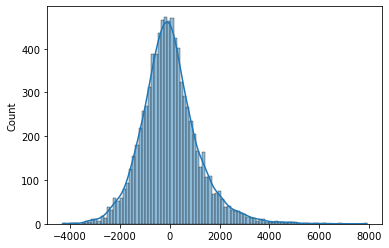

In [207]:
sns.histplot(residual, kde=True)